<a href="https://colab.research.google.com/github/PollyIva/Codebasics_/blob/main/DL_14_mini_batch_gd_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import random


In [ ]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
10,1800,3,82.0
8,1310,3,50.0
1,2600,4,120.0
14,2250,3,101.0
13,1100,2,40.0


In [ ]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [ ]:
def mini_batch_gradient_descent(X, y_true,  epochs, batch_size, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):  
        random_index = [random.randint(0,total_samples-1) for J in range(batch_size)] # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(sample_y-y_predicted))
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.90173303, 0.87901658]), -0.19782006960201742, 0.04625141485072802)

In [ ]:
(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [ ]:
X = scaled_X
total_samples = X.shape[0]

random_index = [random.randint(0,total_samples-1) for J in range(50)] # random index from total samples
sample_x = X[random_index]

In [ ]:
random_indices = np.random.permutation(total_samples)
random_indices

array([17,  0,  8,  4,  1,  3, 16,  7,  9, 11, 14,  2, 12,  5, 18, 13, 10,
        6, 19, 15])

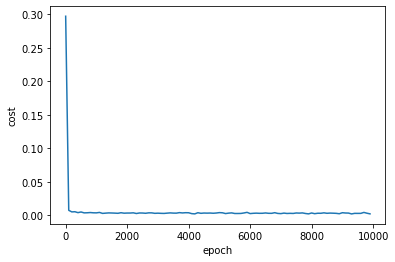

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)


In [ ]:
random_indices = np.random.permutation(total_samples)
random_indices

array([16, 14, 19,  8,  6,  3,  1,  9,  0, 17, 10, 18, 12,  7,  2,  5, 15,
       13,  4, 11])